In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Optional, Union
from meteo_pkg.loader import MeteoLoader

In [2]:
loader = MeteoLoader("../data/processed/datos_renombrados.parquet")
df = loader.df
#a ver si nomas sumando funciona (esto está mal)
df["energia_Ig"] = df["Ig"].cumsum() 
df["energia_Ib"] = df["Ib"].cumsum()
df["energia_Id"] = df["Id"].cumsum()

df[["energia_Ig", "energia_Ib", "energia_Id"]].head()


,energia_Ig,energia_Ib,energia_Id
TIMESTAMP,,,
2021-11-11 14:20:00,682.1,491.6,249.9
2021-11-11 14:30:00,1383.8,1074.6,472.3
2021-11-11 14:40:00,2001.2,1584.5,673.6
2021-11-11 14:50:00,2563.3,2023.2,880.6
2021-11-11 15:00:00,3153.2,2533.2,1085.9


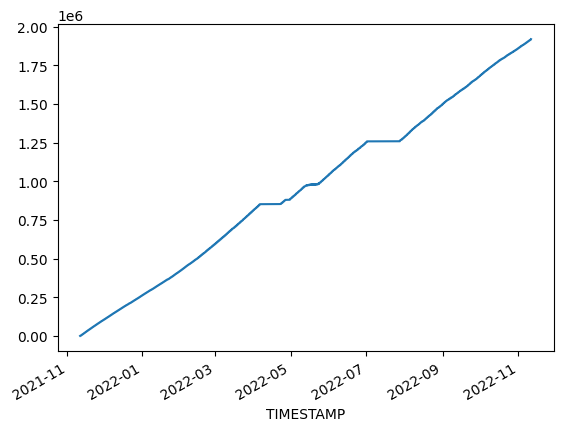

In [3]:
dt_h = df.index.to_series().diff().dt.total_seconds().median() / 3600   # dt bien

energia_intento = df["Ig"].cumsum() * dt_h 

energia_intento.plot()
plt.show() #?????????

In [4]:
def energia_solar(df):
    dt_h = df.index.to_series().diff().dt.total_seconds().median() / 3600
    energia_Ig = df["Ig"].sum() * dt_h
    energia_Ib = df["Ib"].sum() * dt_h
    energia_Id = df["Id"].sum() * dt_h

In [5]:
energia_solar(df)  ### xd (no hace nada) a ya vi

In [6]:
def energia_radiacion (df: pd.DataFrame, columnas: list[str] = ["Ig", "Ib", "Id"], inicio: Optional[Union[str, pd.Timestamp]] = None,
    fin: Optional[Union[str, pd.Timestamp]] = None, regresar_df: bool = False):
    
    """ Calcula la energía acumulada de las componentes de radiación solar en el periodo solicitado 
    (o en todo el dataset si el usuario lo especifica) """

    datos = df.copy()
    if inicio is not None:
        datos = datos.loc[pd.to_datetime(inicio):]
    if fin is not None:
        datos = datos.loc[:pd.to_datetime(fin)]

    tiempos = datos.index.to_series().diff().dt.total_seconds().median()
    dt_h = tiempos / 3600  # convertir a horas

    energias = {}
    for col in columnas:
        energias[col] = (datos[col].sum() * dt_h)  # Wh/m2

    plt.figure(figsize=(8, 5))
    plt.bar(energias.keys(), energias.values(), color=["gold", "orange", "red"])
    
    periodo_txt = f"{datos.index.min().date()} → {datos.index.max().date()}"
    plt.title(f"Energía integrada del periodo\n{periodo_txt}")
    plt.ylabel("Energía [Wh/m²]")
    plt.tight_layout()
    plt.show()

    if regresar_df:
        return pd.DataFrame.from_dict(energias, orient="index", columns=["E_Wh_m2"])

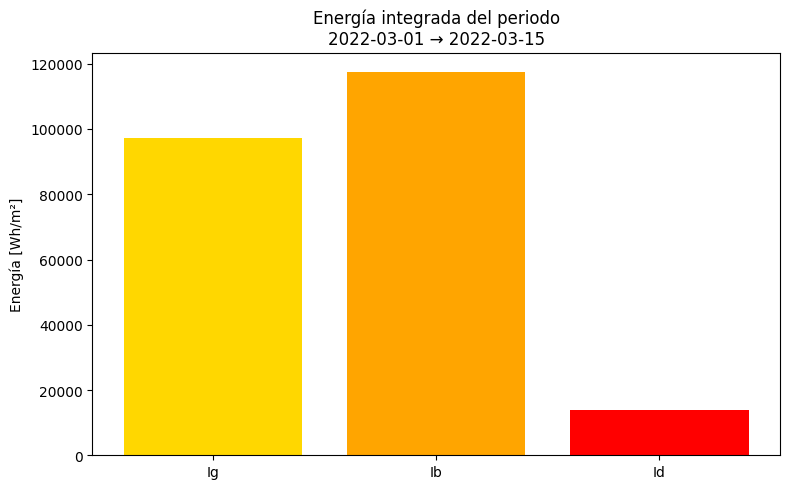

,E_Wh_m2
Ig,97391.030000
Ib,117525.953000
Id,13817.138667


In [7]:
loader = MeteoLoader("../data/processed/datos_renombrados.parquet")
df = loader.df
energia_radiacion(df, inicio="2022-03-01", fin="2022-03-15", regresar_df=True)